本脚本展示如何使用cv2.applyColorMap

In [1]:
# 导入阅读代码工具
import sys
import os.path as osp
sys.path.append('/home/wushaogui/ReadCode/')
from my_read_code_tools import *

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import copy

# 使用展示

In [3]:
def show_with_matplotlib(color_img, title, pos):
    img_RGB = color_img[:, :, ::-1]
    ax = plt.subplot(4, 7, pos)
    plt.imshow(img_RGB)
    plt.title(title, fontsize=8)
    plt.axis('off')

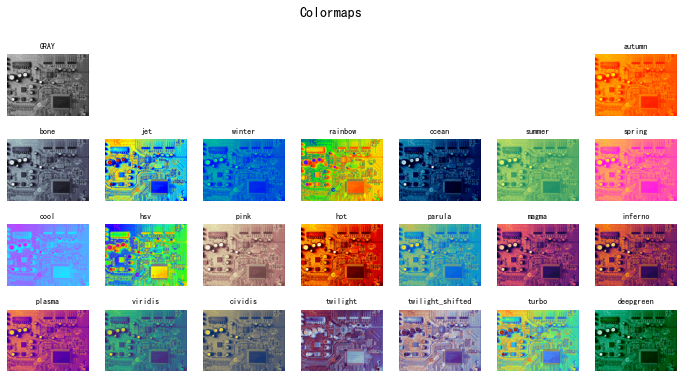

In [4]:
# Load the image and convert it to grayscale image 
gray_img = cv2.imread('board.jpg', cv2.IMREAD_GRAYSCALE)
# Color mapping list 
colormaps = ["COLORMAP_AUTUMN","COLORMAP_BONE","COLORMAP_JET","COLORMAP_WINTER","COLORMAP_RAINBOW","COLORMAP_OCEAN","COLORMAP_SUMMER","COLORMAP_SPRING","COLORMAP_COOL","COLORMAP_HSV","COLORMAP_PINK","COLORMAP_HOT","COLORMAP_PARULA","COLORMAP_MAGMA","COLORMAP_INFERNO","COLORMAP_PLASMA","COLORMAP_VIRIDIS","COLORMAP_CIVIDIS","COLORMAP_TWILIGHT","COLORMAP_TWILIGHT_SHIFTED","COLORMAP_TURBO","COLORMAP_DEEPGREEN"]

plt.figure(figsize=(12, 6))
plt.suptitle("Colormaps", fontsize=14, fontweight='bold')
show_with_matplotlib(cv2.cvtColor(gray_img, cv2.COLOR_GRAY2BGR), "GRAY", 1)
# Apply color mapping 
for idx, val in enumerate(colormaps):
    show_with_matplotlib(cv2.applyColorMap(gray_img, idx), colormaps[idx].replace("COLORMAP_", "").lower(), idx + 7)
plt.show()

# 使用例子

In [5]:
filename='/home/wushaogui/ReadCode/Test/demo.bmp'

img=cv2.imread(filename,-1)
img.shape,img.size,img.shape[0]*img.shape[1]

((3000, 4096, 3), 36864000, 12288000)

In [6]:
np.min(img),np.max(img),np.mean(img),np.std(img),np.mean(img)-np.std(img),np.median(img),np.max(img)-np.min(img)

(73, 255, 172.4916974826389, 30.19288009953545, 142.29881738310345, 170.0, 182)

In [7]:
# 0值使用均值替代
copyimg1=copy.deepcopy(img)
copyimg1=np.where(copyimg1==0,np.mean(copyimg1),copyimg1)
np.min(copyimg1),np.max(copyimg1),np.mean(copyimg1),np.std(copyimg1),np.median(copyimg1),np.max(copyimg1)-np.min(copyimg1)

(73.0, 255.0, 172.4916974826389, 30.19288009953545, 170.0, 182.0)

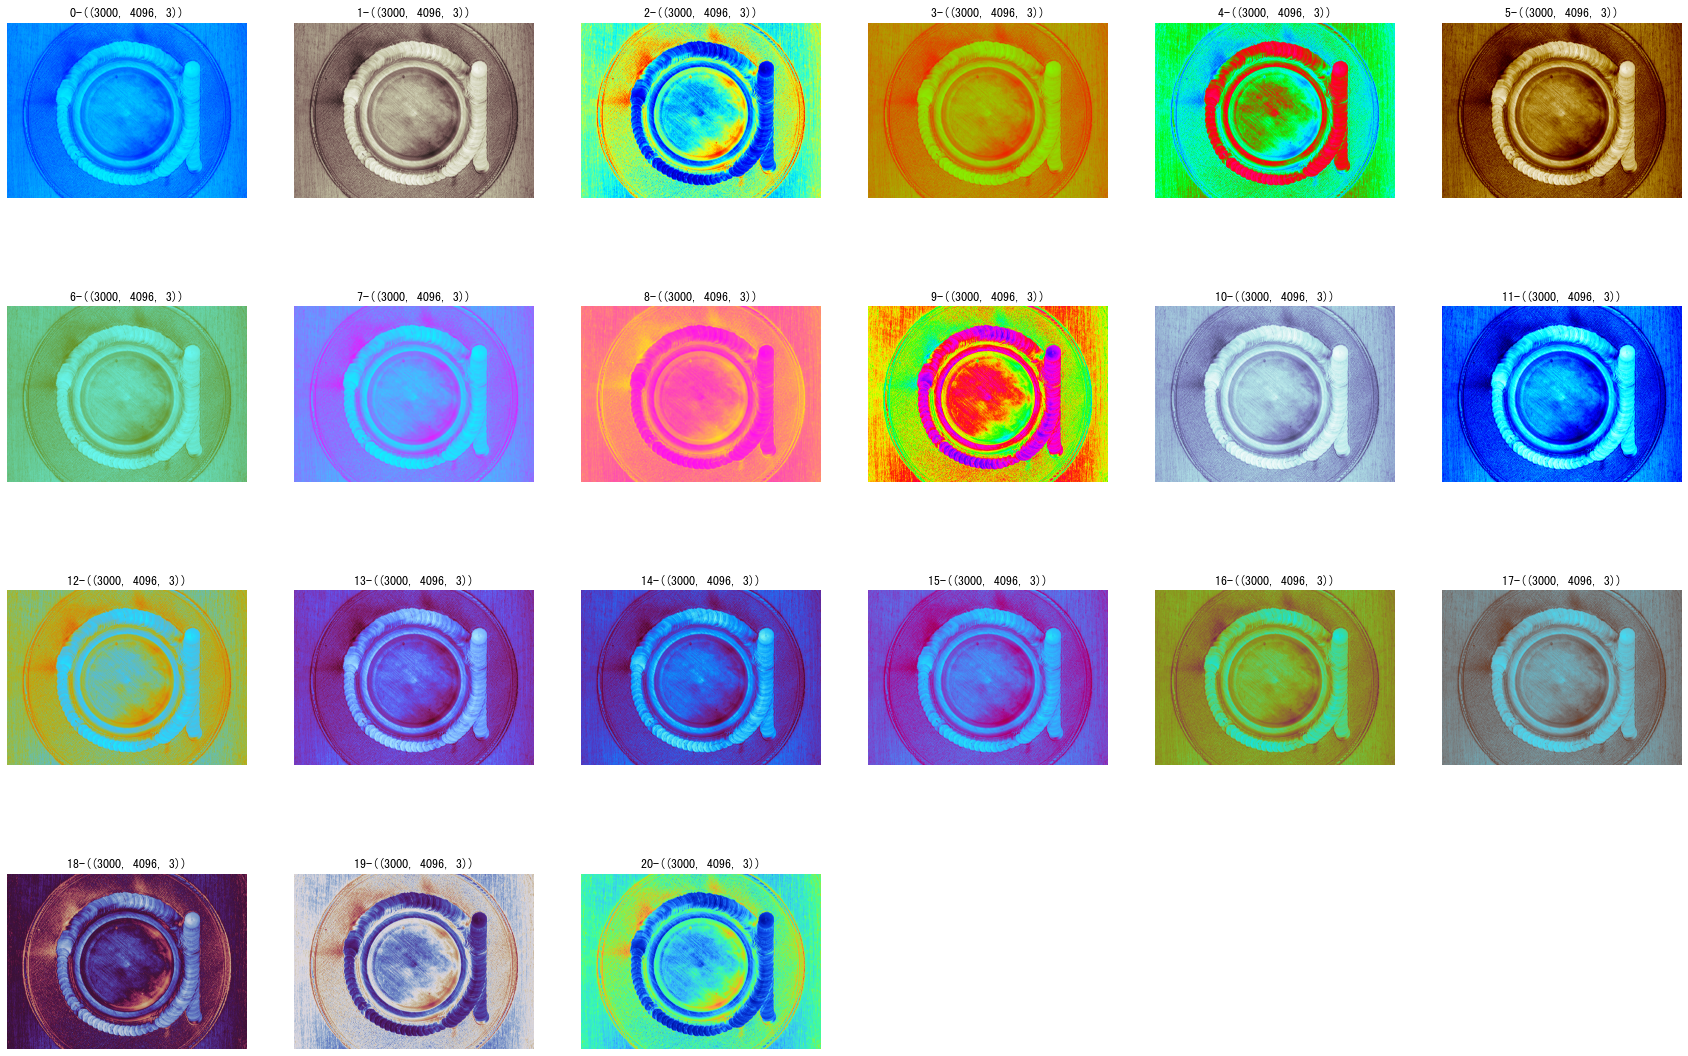

In [8]:
nor_filter_img=(copyimg1-np.min(copyimg1))/((np.max(copyimg1)-np.min(copyimg1)))*255
all_color_img=[]
for i in range(21):
    app_color_img=cv2.applyColorMap(nor_filter_img.astype(np.uint8),i)
    all_color_img.append(app_color_img)
    # cv2.imwrite(F'{filename}-{i}.png',app_color_img[...,::-1])

show_images(all_color_img)